In [ ]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api

In [ ]:
#выгрудаем данные
df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Построим модель, где будем смотреть, где пол - единственная независмая переменная


In [ ]:
model = smf.glm(
    formula="survived ~ sex", data=df, family=statsmodels.api.families.Binomial()
).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Wed, 29 Jan 2025   Deviance:                       917.80
Time:                        16:43:22   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      

Давайте поймем откуда получился такой Intercept и slope

Для начал построим таблицу сопряженности

In [ ]:
table_cont = pd.crosstab(index=df['survived'], columns=df['sex'])
print(table_cont)


sex       female  male
survived              
0             81   468
1            233   109


Посчитаем шансы выжить у мужчин и у женщин


In [ ]:
male_odds = 109/468
female_odds = 233/81
print(male_odds)
print(female_odds)


0.2329059829059829
2.876543209876543


Найдем логарифм шансов выжить женщине (logit)

In [ ]:
ln_female_odds = np.log(female_odds)
print(ln_female_odds) # Это и есть наш intercept


1.0565892988932617


Действительно, это и есть intersept <=> логарифм шансов выжить, при условии что sex - female

In [ ]:
#но при это логарифм шансов выжить у мужчин != coef sex[T.male]

ln_male_odds = np.log(male_odds)
print(ln_male_odds)


-1.457120413688503


Но что это тогда за значение у коэфицента у sex_male?

На самом деле это отношение шансов (odds_ratio = odds_male / odds_female). Но только еще взять логарифм надо

In [ ]:
odds_ratio = male_odds / female_odds
ln_odds_ratio = np.log(odds_ratio) # 0.080 => шансы выжить у женщин намного больше, чем у мужчин
print(ln_odds_ratio)


-2.5137097125817647


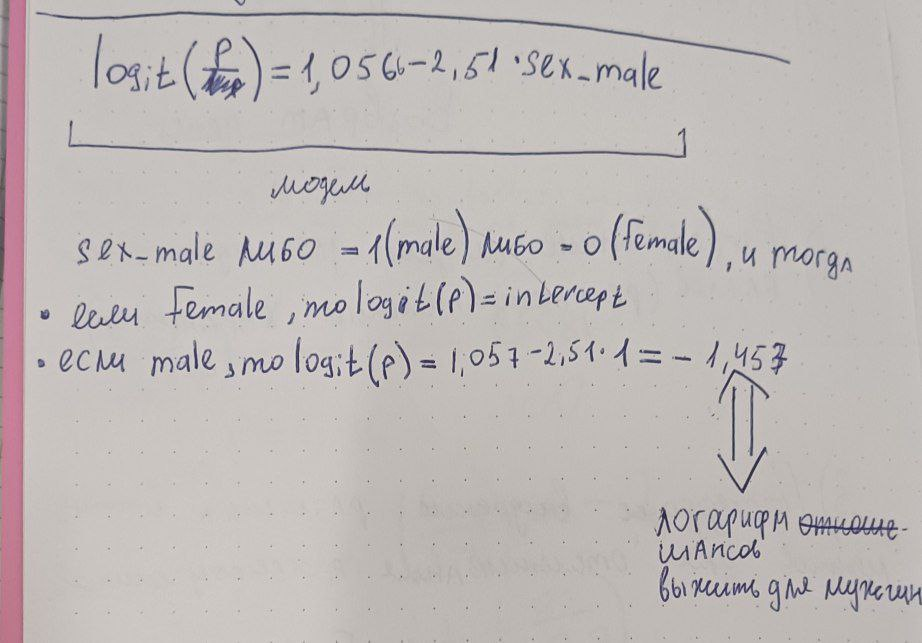

# Почему у нас нет коэфицента для sex_female?

Дело в том, что  номинативные переменные компьютером перводятся в значения 0 и 1. И получается примерно такая картина:

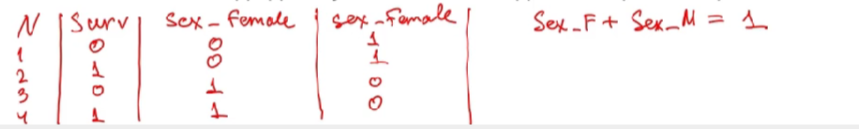

То есть связь между этими переменными была бы линейная. Значит была бы мультиколленеарность, а это недопустимо.

# Что еще можно узнать из модели?

In [ ]:
model = smf.glm(
    formula="survived ~ sex", data=df, family=statsmodels.api.families.Binomial()
).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Wed, 29 Jan 2025   Deviance:                       917.80
Time:                        17:51:09   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      

Поскольку ln(odds_male/odds_female) = -2.51, => odds_male / odds_female < 1 => шансы выжить у девушек больше, чем у мужчин.

Также поскольку P>|z| => это статистически значимо

Ну и мы  можем посчитать во сколько шасны выжить у женщин больше чем у мужчин

In [ ]:
x = np.exp(-2.51)**-1
print(x)

12.30493006051041


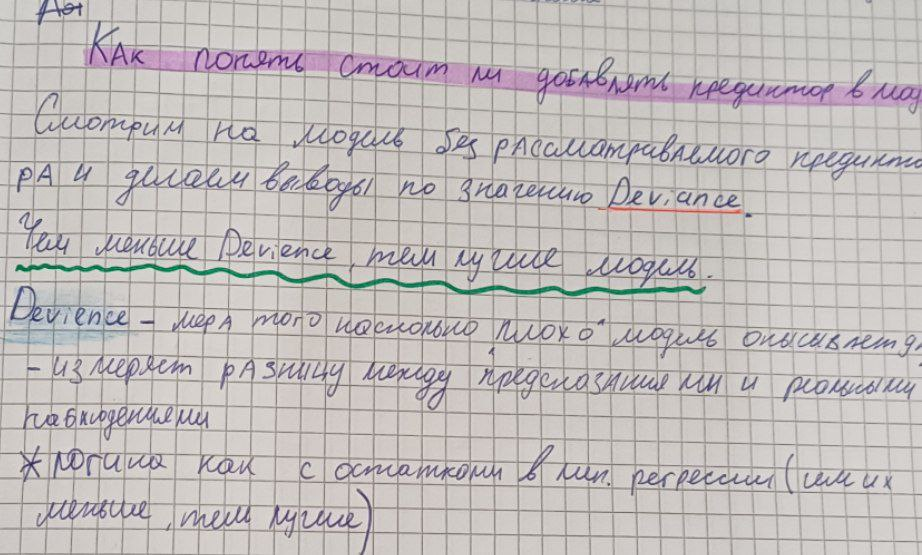